## Load Experiment Data

In [1]:
# Load the policy
import os
import pandas
from garage.experiment import Snapshotter
import pandas as pd
EXPERIMENT_NAME = "CL_point_env_51"
experiment_dir = os.path.join("data/local/experiment", EXPERIMENT_NAME)
snapshotter = Snapshotter()
data = snapshotter.load(experiment_dir)
policy = data['algo'].policy

# You can also access other components of the experiment
env = data['env']

progress_csv_path = os.path.join(experiment_dir, 'progress.csv')
progress_df = pd.read_csv(progress_csv_path)

2025-01-06 18:10:38.943270: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.




Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(


In [2]:
num_train_tasks=2
from garage.experiment.task_sampler import SetTaskSampler
from garage.envs import GymEnv, normalize
from garage.envs.point_env import PointEnv
from garage.torch.algos.CLMeta import PEARLWorker

worker_args = dict(deterministic=True, accum_context=True)
env_sampler = SetTaskSampler(
    PointEnv,
    wrapper=lambda env, _: normalize(
        env))
env = env_sampler.sample(num_train_tasks)

In [3]:
from garage.experiment.meta_evaluator import MetaEvaluator

meta_evaluator = MetaEvaluator(test_tasks=env,
                               worker_class=PEARLWorker,
                               worker_args=worker_args,
                               n_test_tasks=2)

trajs = meta_evaluator.evaluate(algo=data['algo'])

/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/meta_evaluator.py:81: LoggerWarning: No outputs have been added to the logger.
  logger.log('Sampling for adapation and meta-testing...')
/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/meta_evaluator.py:81: LoggerWarning: Log data of type str was not accepted by any output
  logger.log('Sampling for adapation and meta-testing...')
/Users/paulnitschke/Desktop/projects/geo_meta_rl/garage/experiment/deterministic.py:36: UserWarning: Enabeling deterministic mode in PyTorch can have a performance impact when using GPU.
  warnings.warn(
/Users/paulnitschke/miniconda3/envs/env_geo_meta_rl/lib/python3.9/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'garage.torch.distributions.tanh_normal.TanhNormal'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(
/Users/paulnits



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




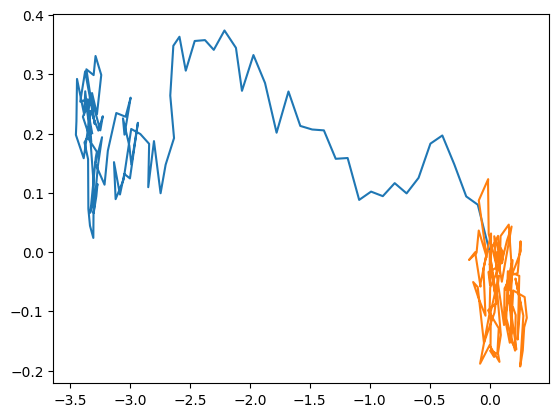

In [14]:
task_1_trajs, task_2_trajs = trajs

task_1_trajs.observations

import matplotlib.pyplot as plt
plt.plot(task_1_trajs.observations[:,0], task_1_trajs.observations[:,1], label="Task 1")
plt.plot(task_2_trajs.observations[:,0], task_2_trajs.observations[:,1], label="Task 2")

# Visualize Meta-RL Policies

In [4]:
from garage.experiment.task_sampler import SetTaskSampler
from garage.envs import GymEnv, normalize
from copy import deepcopy
num_train_tasks=2

base_env = PointEnv()
task_1 = base_env
task_2 = deepcopy(base_env)


tasks = base_env.sample_tasks(num_train_tasks)

task_1.set_task(tasks[0])
task_2.set_task(tasks[1])

In [25]:
from garage.envs.point_env import PointEnv

env_1 = PointEnv(goal=(-1,0), max_episode_length=100)
env_2 = PointEnv(goal=(1,0), max_episode_length=100)
env_3 = PointEnv(goal=(-0.5,0), max_episode_length=100)
envs = [env_1, env_2, env_3]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


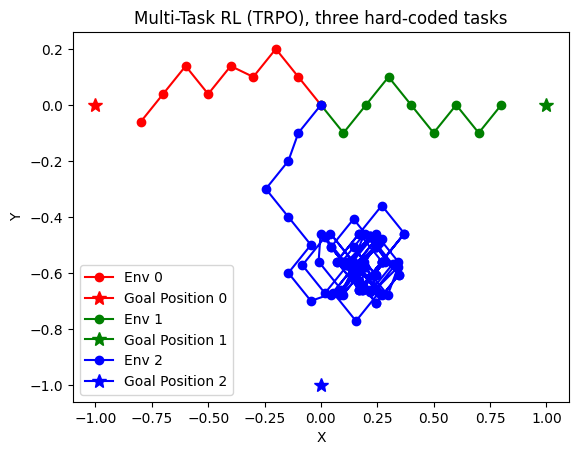

In [29]:
all_observations
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']
for idx, observations in all_observations.items():
    x = [obs[0] for obs in observations]
    y = [obs[1] for obs in observations]
    plt.plot(x, y, color=colors[idx], label=f'Env {idx}', marker='o')
    # Add goal positions
    goal_positions = [(-1, 0), (1, 0), (0, -1)]

    # Color the goal positions in red, green, and blue
    plt.plot(goal_positions[idx][0], goal_positions[idx][1], color=colors[idx], marker='*', markersize=10, label=f'Goal Position {idx}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Multi-Task RL (TRPO), three hard-coded tasks')
plt.show()

In [26]:


import numpy as np

all_rewards, all_observations, all_actions = {}, {}, {}
tasks_one_hot = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
for idx_env, env in enumerate(envs):
    all_rewards[idx_env] = []
    all_observations[idx_env] = []
    all_actions[idx_env] = []
    state, task = env.reset()
    step_count = 0
    done = False
    while not done:
        obs = np.concatenate([state, tasks_one_hot[idx_env]])
        action, _ = policy.get_action(obs)
        out = env.step(action)
        state = out.observation
        all_rewards[idx_env].append(out.reward)
        all_actions[idx_env].append(action)
        all_observations[idx_env].append(obs)
        done = out.env_info['success'] or step_count == 99
        step_count += 1

0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [3]:
steps, max_steps = 0, 150
done = False
obs, task = env.reset()  # The initial observation

while steps < max_steps and not done:
    action, _ = policy.get_action(obs)
    out = env.step(action)
    render = env.render(mode=None)  # Render the environment to see what's going on (optional)
    print(render)
    done = out.env_info['success']
    steps += 1

env.close()

Point: [-0.1  0.1], Goal: [-1.  0.]
Point: [-0.2        0.1477441], Goal: [-1.  0.]
Point: [-0.3         0.16164854], Goal: [-1.  0.]
Point: [-0.4         0.12722915], Goal: [-1.  0.]
Point: [-0.5         0.10345511], Goal: [-1.  0.]
Point: [-0.6         0.15011722], Goal: [-1.  0.]
Point: [-0.70000005  0.13882434], Goal: [-1.  0.]
Point: [-0.8000001   0.07686855], Goal: [-1.  0.]
Point: [-0.9000001   0.12039386], Goal: [-1.  0.]
Point: [-1.0000001   0.11585215], Goal: [-1.  0.]


/Users/paulnitschke/miniconda3/envs/env_geo_meta_rl/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
